In [1]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import pickle
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
output_file_path = "/data/private/pdutta/Collab_data/Wang_collaborator/PCA_result"

In [5]:
df = pd.read_excel("/data/private/pdutta/Collab_data/Wang_collaborator/Survival_vs_death_first_day.xlsx")
df.shape

(10788, 49)

In [6]:
df.head(20)

,MouseNo,Severity,Death_0 /Survival_1,CD4,CD8a,CD25,IFN-γ,GM-CSF,IL-4,IL-5,...,Granzyme B,CCL4,CD15,CD182,CD197,IL-21,HLA-DR,CD181,β-Actin,IL-22
0,1,1,1,864.202653,653.388036,533.532407,622.283386,601.880699,523.256709,610.188377,...,648.804947,585.191381,622.984062,507.160020,521.665598,745.204173,625.576933,890.473356,730.239695,606.385944
1,1,1,1,502.256482,568.373980,988.122802,598.716245,645.511790,551.418641,560.904324,...,566.797908,902.976225,541.336585,509.972729,532.145073,513.079211,579.316823,536.086193,690.569707,538.364672
2,1,1,1,463.854773,543.952941,1117.471229,1105.009940,715.989935,541.132319,540.647678,...,587.347451,737.662682,515.291416,780.231103,606.187356,715.505628,569.176593,647.409062,584.242162,537.659564
3,1,1,1,2302.596767,1930.261640,588.094329,2349.308486,1805.575452,751.555302,2199.713286,...,972.315900,534.148282,679.868074,517.515480,490.278047,688.949714,524.763762,517.817829,763.693559,657.198799
4,1,1,1,1058.718278,3091.961426,523.016158,1387.892393,961.391537,963.863794,1837.281826,...,756.944868,1041.256293,543.882557,504.251373,510.271727,610.724690,582.022937,601.456194,720.723971,662.802631
5,1,1,1,2418.428574,845.549889,504.169945,714.724978,1473.802184,1024.840705,1823.074582,...,833.234533,983.239167,620.761161,568.014233,517.090090,626.185674,514.810013,546.470574,703.633271,557.380318
6,1,1,1,2010.637201,2838.474841,529.289258,742.795405,1366.229126,892.249453,983.676275,...,663.685095,1468.113192,637.723136,542.737009,575.964986,636.125353,502.147592,556.446473,878.825424,541.504603
7,1,1,1,1423.890754,954.820268,513.026226,2177.669702,1360.817371,813.376838,2209.773142,...,557.106513,569.331972,576.766093,499.874387,543.436410,574.512953,516.323004,505.780581,634.883564,578.725316
8,1,1,1,1768.039773,841.160408,552.858108,2433.787251,1451.730380,995.562072,1947.466785,...,685.863976,1040.576883,629.455859,524.466321,509.876372,577.984592,550.098389,514.365746,618.125529,512.396249
9,1,1,1,737.596065,945.982474,584.048760,2424.724093,1376.149390,848.858780,1784.940630,...,792.719267,905.189311,642.509867,496.837116,501.755556,601.063696,534.524566,560.327773,633.589630,583.589784


In [7]:
df_discreate = df[['MouseNo','Severity','Death_0 /Survival_1']]
column_list = df.iloc[:,3:].columns.to_list()
for column in column_list:
    df_discreate[column] = pd.qcut(df[column], q=10, labels=[1, 2, 3,4,5,6,7,8,9,10])

/tmp/ipykernel_1623423/251649227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_discreate[column] = pd.qcut(df[column], q=10, labels=[1, 2, 3,4,5,6,7,8,9,10])
/tmp/ipykernel_1623423/251649227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_discreate[column] = pd.qcut(df[column], q=10, labels=[1, 2, 3,4,5,6,7,8,9,10])
/tmp/ipykernel_1623423/251649227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [8]:
df_discreate = df_discreate.astype(float)
df_discreate['MouseNo'] = df['MouseNo'].astype(int)
df_discreate

,MouseNo,Severity,Death_0 /Survival_1,CD4,CD8a,CD25,IFN-γ,GM-CSF,IL-4,IL-5,...,Granzyme B,CCL4,CD15,CD182,CD197,IL-21,HLA-DR,CD181,β-Actin,IL-22
0,1,1.0,1.0,6.0,4.0,8.0,3.0,4.0,2.0,2.0,...,8.0,6.0,10.0,4.0,8.0,10.0,10.0,10.0,10.0,10.0
1,1,1.0,1.0,1.0,2.0,10.0,2.0,6.0,5.0,1.0,...,5.0,10.0,8.0,5.0,9.0,3.0,10.0,9.0,10.0,7.0
2,1,1.0,1.0,1.0,1.0,10.0,7.0,7.0,4.0,1.0,...,6.0,9.0,4.0,10.0,10.0,10.0,10.0,10.0,8.0,7.0
3,1,1.0,1.0,9.0,7.0,10.0,10.0,10.0,10.0,10.0,...,10.0,3.0,10.0,7.0,1.0,10.0,8.0,7.0,10.0,10.0
4,1,1.0,1.0,6.0,9.0,6.0,8.0,9.0,10.0,9.0,...,10.0,10.0,9.0,3.0,5.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,19,4.0,0.0,2.0,7.0,5.0,1.0,3.0,1.0,6.0,...,1.0,4.0,4.0,2.0,3.0,1.0,3.0,2.0,2.0,7.0
10784,19,4.0,0.0,4.0,6.0,4.0,2.0,2.0,1.0,5.0,...,1.0,7.0,4.0,4.0,4.0,1.0,1.0,6.0,3.0,3.0
10785,19,4.0,0.0,3.0,7.0,5.0,1.0,2.0,2.0,3.0,...,2.0,3.0,4.0,9.0,3.0,1.0,3.0,3.0,3.0,3.0
10786,19,4.0,0.0,3.0,9.0,2.0,3.0,2.0,5.0,8.0,...,2.0,4.0,4.0,3.0,4.0,1.0,3.0,2.0,3.0,3.0


In [9]:
type(df['CD4'][0])

numpy.float64

In [10]:
# #df_temp = df.iloc[:,3:]
# df_check = df[df<1500]
# df_check.dropna()

# Feature selection while we are doing classification on Severity

In [11]:
df.groupby(['MouseNo','Severity']).size()

MouseNo  Severity
1        1           655
2        1           724
3        1           565
4        1           112
5        3           602
6        3           484
7        3           563
8        3           544
9        3           613
10       2           555
11       2           592
12       2           672
13       2           579
14       2           625
15       4           509
16       4           533
17       4           484
18       4           653
19       4           724
dtype: int64

In [12]:
grouped_df =  df_discreate.groupby(['MouseNo'])
df_mean = grouped_df.mean()
X_train, X_test, y_train, y_test = train_test_split( df_mean.iloc[:,3:], df_mean['Severity'], test_size=0.20, random_state=42, stratify=df_mean['Severity'])

In [13]:
y_train

MouseNo
9     3.0
3     1.0
16    4.0
10    2.0
5     3.0
8     3.0
13    2.0
2     1.0
18    4.0
17    4.0
12    2.0
15    4.0
6     3.0
4     1.0
11    2.0
Name: Severity, dtype: float64

In [14]:
y_test 

MouseNo
14    2.0
1     1.0
19    4.0
7     3.0
Name: Severity, dtype: float64

In [15]:
train_index= list(y_train.index.values)
test_index= list(y_test.index.values)
print("Train Mouse Numbers and severity", train_index, list(y_train.values))
print("Test Mouse Numbers and severity", test_index, list(y_test.values))

Train Mouse Numbers and severity [9, 3, 16, 10, 5, 8, 13, 2, 18, 17, 12, 15, 6, 4, 11] [3.0, 1.0, 4.0, 2.0, 3.0, 3.0, 2.0, 1.0, 4.0, 4.0, 2.0, 4.0, 3.0, 1.0, 2.0]
Test Mouse Numbers and severity [14, 1, 19, 7] [2.0, 1.0, 4.0, 3.0]


In [16]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for key, item in grouped_df:
    if key in train_index :
        print("training")
        df_train = pd.concat([df_train,item], ignore_index=True)
    else:
        df_test = pd.concat([df_test,item], ignore_index=True)

training
training
training
training
training
training
training
training
training
training
training
training
training
training
training


In [17]:
df_test

,MouseNo,Severity,Death_0 /Survival_1,CD4,CD8a,CD25,IFN-γ,GM-CSF,IL-4,IL-5,...,Granzyme B,CCL4,CD15,CD182,CD197,IL-21,HLA-DR,CD181,β-Actin,IL-22
0,1,1.0,1.0,6.0,4.0,8.0,3.0,4.0,2.0,2.0,...,8.0,6.0,10.0,4.0,8.0,10.0,10.0,10.0,10.0,10.0
1,1,1.0,1.0,1.0,2.0,10.0,2.0,6.0,5.0,1.0,...,5.0,10.0,8.0,5.0,9.0,3.0,10.0,9.0,10.0,7.0
2,1,1.0,1.0,1.0,1.0,10.0,7.0,7.0,4.0,1.0,...,6.0,9.0,4.0,10.0,10.0,10.0,10.0,10.0,8.0,7.0
3,1,1.0,1.0,9.0,7.0,10.0,10.0,10.0,10.0,10.0,...,10.0,3.0,10.0,7.0,1.0,10.0,8.0,7.0,10.0,10.0
4,1,1.0,1.0,6.0,9.0,6.0,8.0,9.0,10.0,9.0,...,10.0,10.0,9.0,3.0,5.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,19,4.0,0.0,2.0,7.0,5.0,1.0,3.0,1.0,6.0,...,1.0,4.0,4.0,2.0,3.0,1.0,3.0,2.0,2.0,7.0
2563,19,4.0,0.0,4.0,6.0,4.0,2.0,2.0,1.0,5.0,...,1.0,7.0,4.0,4.0,4.0,1.0,1.0,6.0,3.0,3.0
2564,19,4.0,0.0,3.0,7.0,5.0,1.0,2.0,2.0,3.0,...,2.0,3.0,4.0,9.0,3.0,1.0,3.0,3.0,3.0,3.0
2565,19,4.0,0.0,3.0,9.0,2.0,3.0,2.0,5.0,8.0,...,2.0,4.0,4.0,3.0,4.0,1.0,3.0,2.0,3.0,3.0


In [18]:
print(df_train.shape)
print(df_test.shape)

(8221, 49)
(2567, 49)


In [19]:
X_train  = df_train.iloc[:,3:]
X_test = df_test.iloc[:,3:]
Y_train = df_train['Severity']
Y_test = df_test['Severity']

In [20]:
clf = RandomForestClassifier(n_estimators = 1000) 
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Random forest", metrics.accuracy_score(Y_pred, Y_test))

Random forest 0.3880015582391897


In [21]:
clf.feature_importances_

array([0.01866425, 0.01977662, 0.01311806, 0.01292595, 0.02172628,
       0.01482439, 0.01507358, 0.01985564, 0.01466989, 0.02192613,
       0.07199814, 0.03005173, 0.02018956, 0.01577674, 0.02268886,
       0.01939021, 0.01432981, 0.03076109, 0.03897168, 0.01295188,
       0.01641379, 0.01352755, 0.01321757, 0.02866276, 0.01446551,
       0.02868887, 0.01334631, 0.02976591, 0.01827825, 0.02874071,
       0.01472791, 0.01380601, 0.01937449, 0.01341441, 0.02096493,
       0.02044113, 0.03507718, 0.02467998, 0.02380862, 0.0165878 ,
       0.01677857, 0.01375618, 0.01361379, 0.01254528, 0.07225535,
       0.01339066])

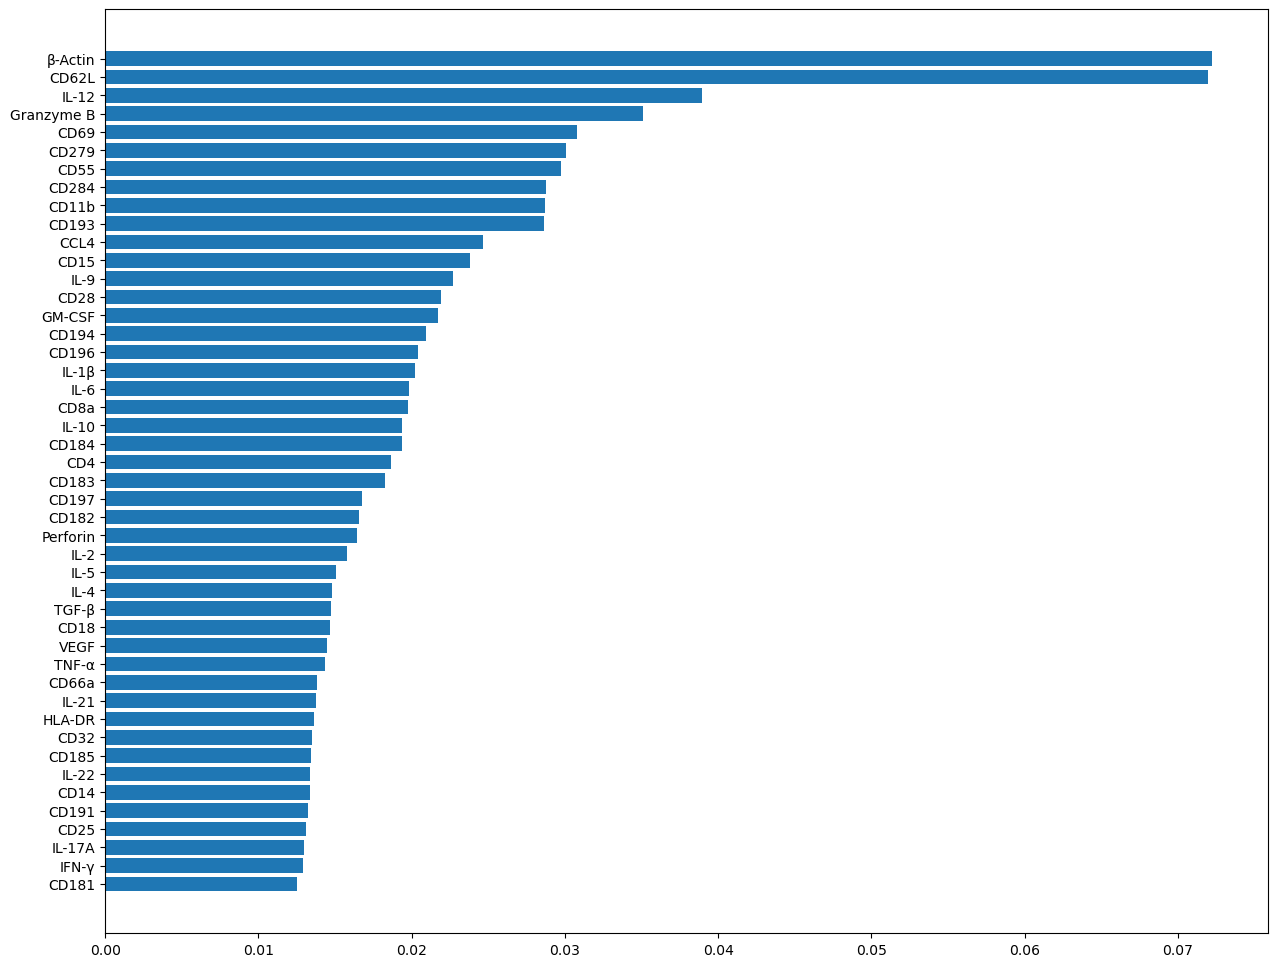

In [22]:
plt.figure(figsize=(15, 12))  
f_i = list(zip(df.columns[3:],clf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()

In [23]:
Y_pred = clf.predict(X_test)
#print("Random forest", metrics.accuracy_score(Y_test, Y_pred))

conf_mat = confusion_matrix(Y_test, Y_pred)
print(conf_mat)

[[ 16 620   5  14]
 [ 51 395 129  50]
 [ 23 113 323 104]
 [  9  20 433 262]]


In [24]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.3880015582391897


## Mouse wise performance

In [25]:
grouped_df_test = df_test.groupby('MouseNo')
X_train  = df_train.iloc[:,3:]
Y_train = df_train['Severity']

for key, item in grouped_df_test:
    print('Mouse Number',key)
    X_test = df_test[df_test['MouseNo']==key].iloc[:,3:]
    Y_test = df_test[df_test['MouseNo']==key]['Severity']
    clf = RandomForestClassifier(n_estimators = 1000) 
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy for Mouse numer {}".format(key), metrics.accuracy_score(Y_pred, Y_test))
    print(confusion_matrix(Y_test, Y_pred))

Mouse Number 1
Accuracy for Mouse numer 1 0.02748091603053435
[[ 18 617   5  15]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
Mouse Number 7
Accuracy for Mouse numer 7 0.5772646536412078
[[  0   0   0   0]
 [  0   0   0   0]
 [ 26 114 325  98]
 [  0   0   0   0]]
Mouse Number 14
Accuracy for Mouse numer 14 0.6336
[[  0   0   0   0]
 [ 52 396 129  48]
 [  0   0   0   0]
 [  0   0   0   0]]
Mouse Number 19
Accuracy for Mouse numer 19 0.35911602209944754
[[  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [ 14  20 430 260]]


## Severity accuracy for all 19 mice

In [33]:
for mouse_no in range(1,20):
    print(mouse_no)
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    for key, item in grouped_df:
        key = int(''.join(map(str, key)))
        if (key==mouse_no) :
            print("testing")
            df_test = pd.concat([df_test,item], ignore_index=True)
        else:
            df_train = pd.concat([df_train,item], ignore_index=True)
    print(df_test.shape, df_train.shape, df_test.shape[0]+ df_train.shape[0])
    X_train  = df_train.iloc[:,3:]
    X_test = df_test.iloc[:,3:]
    Y_train = df_train['Severity']
    Y_test = df_test['Severity']
    print(Y_test[0])
    clf = RandomForestClassifier(n_estimators = 1000) 
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy for Mouse numer {}".format(key), metrics.accuracy_score(Y_pred, Y_test))
    print(confusion_matrix(Y_test, Y_pred))

1
testing
(655, 49) (10133, 49) 10788
1.0
Accuracy for Mouse numer 19 0.021374045801526718
[[ 14 598  31  12]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
2
testing
(724, 49) (10064, 49) 10788
1.0
Accuracy for Mouse numer 19 0.049723756906077346
[[ 36 501 165  22]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
3
testing
(565, 49) (10223, 49) 10788
1.0
Accuracy for Mouse numer 19 0.13628318584070798
[[ 77 188 225  75]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
4
testing
(112, 49) (10676, 49) 10788
1.0
Accuracy for Mouse numer 19 0.3392857142857143
[[38 17 44 13]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]
5
testing
(602, 49) (10186, 49) 10788
3.0
Accuracy for Mouse numer 19 0.6179401993355482
[[  0   0   0   0]
 [  0   0   0   0]
 [ 23  91 372 116]
 [  0   0   0   0]]
6
testing
(484, 49) (10304, 49) 10788
3.0
Accuracy for Mouse numer 19 0.365702479338843
[[  0   0   0   0]
 [  0   0   0   0]
 [  6  43 177 258]
 [  0   0   0   0]]
7
testing
(563, 

## Survival accuracy for all 19 mice

In [34]:
for mouse_no in range(1,20):
    print(mouse_no)
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    for key, item in grouped_df:
        if (key==mouse_no) :
            print("testing")
            df_test = pd.concat([df_test,item], ignore_index=True)
        else:
            df_train = pd.concat([df_train,item], ignore_index=True)
    print(df_test.shape, df_train.shape, df_test.shape[0]+ df_train.shape[0])
    X_train  = df_train.iloc[:,3:]
    X_test = df_test.iloc[:,3:]
    Y_train = df_train['Death_0 /Survival_1']
    Y_test = df_test['Death_0 /Survival_1']
    print(Y_test[0])
    clf = RandomForestClassifier(n_estimators = 1000) 
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy for Mouse numer {}".format(key), metrics.accuracy_score(Y_pred, Y_test))
    print(confusion_matrix(Y_test, Y_pred))

1
(0, 0) (10788, 49) 10788


KeyError: 'Death_0 /Survival_1'

## Get the top 20 feature and do the classification

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,3:], df['Severity'].to_list(), test_size=0.2, random_state=0)

In [ ]:
clf = RandomForestClassifier(n_estimators = 500) 
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Random forest", metrics.accuracy_score(Y_pred, Y_test))

In [ ]:
plt.figure(figsize=(15, 12))  
f_i = list(zip(df.columns[3:],clf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()

In [ ]:
important_features = ['MouseNo','Severity',	'Death_0 /Survival_1']
for i in reversed(f_i[-20:]):
    important_features.append(i[0])

In [ ]:
important_features

In [ ]:
df_important  = df[important_features]
grouped_df_important =  df_important.groupby(['MouseNo'])

### Severity accuracy for all 19 mice based on top 20 features

In [ ]:
for mouse_no in range(1,20):
    print(mouse_no)
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    for key, item in grouped_df_important:
        if (key==mouse_no) :
            print("testing")
            df_test = pd.concat([df_test,item], ignore_index=True)
        else:
            df_train = pd.concat([df_train,item], ignore_index=True)
    print(df_test.shape, df_train.shape, df_test.shape[0]+ df_train.shape[0])
    X_train  = df_train.iloc[:,3:]
    X_test = df_test.iloc[:,3:]
    Y_train = df_train['Severity']
    Y_test = df_test['Severity']
    print("Severity",Y_test[0])
    clf = RandomForestClassifier(n_estimators = 500) 
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy for Mouse numer {}".format(key), metrics.accuracy_score(Y_pred, Y_test))
    print(confusion_matrix(Y_test, Y_pred))

### Survival  accuracy for all 19 mice based on top 20 features 

In [ ]:
for mouse_no in range(1,20):
    print(mouse_no)
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    for key, item in grouped_df_important:
        if (key==mouse_no) :
            print("testing")
            df_test = pd.concat([df_test,item], ignore_index=True)
        else:
            df_train = pd.concat([df_train,item], ignore_index=True)
    print(df_test.shape, df_train.shape, df_test.shape[0]+ df_train.shape[0])
    X_train  = df_train.iloc[:,3:]
    X_test = df_test.iloc[:,3:]
    Y_train = df_train['Death_0 /Survival_1']
    Y_test = df_test['Death_0 /Survival_1']
    print('Death_0 /Survival_1',Y_test[0])
    clf = RandomForestClassifier(n_estimators = 500) 
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy for Mouse numer {}".format(key), metrics.accuracy_score(Y_pred, Y_test))
    print(confusion_matrix(Y_test, Y_pred))